# Indexing Operations

>[Indexing Operations](#scrollTo=UlvsN0N2yfj7)

>>[Renomeando o Indice (Renaming Index)](#scrollTo=OGCWfolc3mOe)

>>[Resetando o indice (Resetting Index)](#scrollTo=8qAxZ8nd7SGa)

>>[O atributo .loc](#scrollTo=c6Uau7b_frGy)

>>[o atributo .iloc](#scrollTo=v8InuivV2DVG)

>>[Heads and Tails](#scrollTo=rSXtA1Z_A_dt)

>>[Amostragem (Sampling)](#scrollTo=VLD4u9rrCXm7)

>>[Filtrando Valores de Indice (Filtering Index Values)](#scrollTo=3nAeO9lSBxst)

>>[Reindexação (Reindex)](#scrollTo=c2DUmR_CE3vt)



## Renomeando o Indice (Renaming Index)

In [ ]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/' \
      'vehicles.csv.zip'
df = pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08
make = df.make

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [ ]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

We can pass in a dictionary to map the previous index label to the new label

In [ ]:
city2 = city_mpg.rename(make.to_dict())
city2

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64

In [ ]:
city2.index

Index(['Alfa Romeo', 'Ferrari', 'Dodge', 'Dodge', 'Subaru', 'Subaru', 'Subaru',
       'Toyota', 'Toyota', 'Toyota',
       ...
       'Saab', 'Saturn', 'Saturn', 'Saturn', 'Saturn', 'Subaru', 'Subaru',
       'Subaru', 'Subaru', 'Subaru'],
      dtype='object', length=41144)

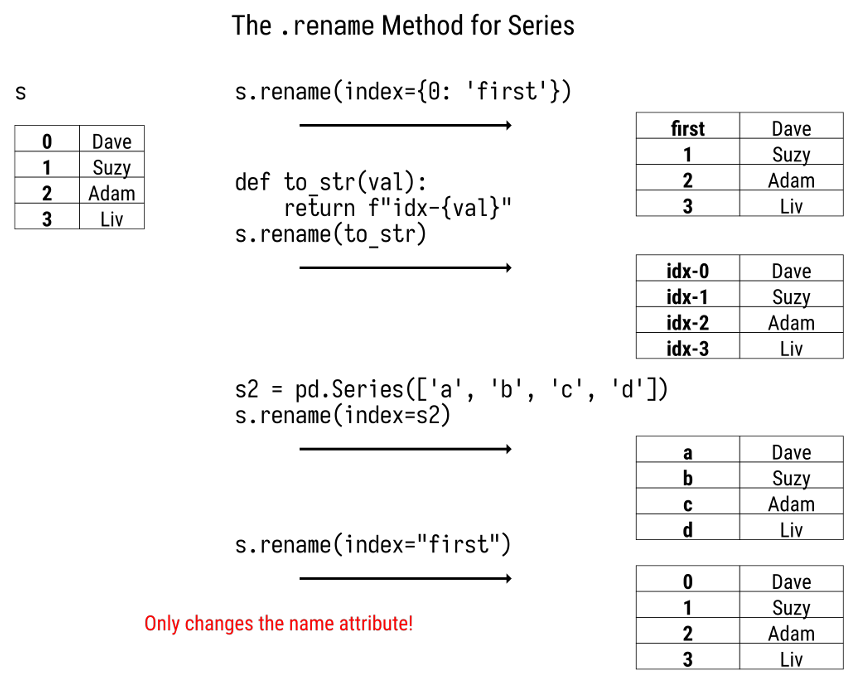

When we pass in a series and the index values are the same, the values from the series that we passed in are used as the index:

In [ ]:
city2 = city_mpg.rename(make)
city2

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64

If you pass a scalar value (a single string) into .rename, the index will stay the same, but the .name attribute of the series will update

In [ ]:
city3 = city_mpg.rename('citympg')
city3

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: citympg, Length: 41144, dtype: int64

## Resetando o indice (Resetting Index)

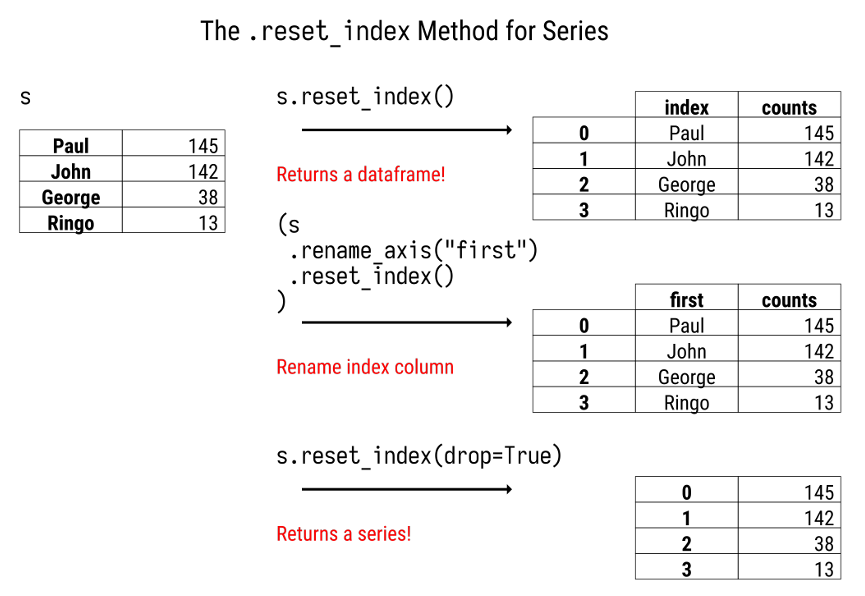

Cria um dataframe movendo o indice para uma coluna.

In [ ]:
city2.reset_index()

,index,city08
0,Alfa Romeo,19
1,Ferrari,9
2,Dodge,23
3,Dodge,10
4,Subaru,17
...,...,...
41139,Subaru,19
41140,Subaru,20
41141,Subaru,18
41142,Subaru,18


Para deletar o atual indice e retornar como uma série, usamos o parametro drop=True

In [ ]:
city2.reset_index(drop=True)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

##O atributo `.loc`

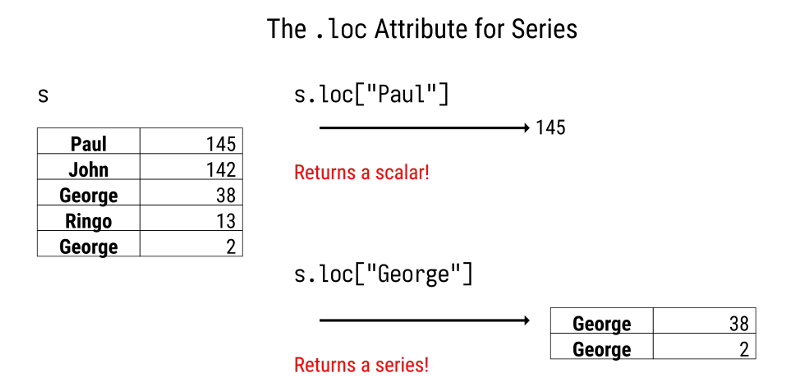

In [ ]:
city2.loc['Subaru']

Subaru    17
Subaru    21
Subaru    22
Subaru    19
Subaru    20
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 885, dtype: int64

In [ ]:
city2.loc['Fisker']

20

Para garantir o retorno de uma serie,passamos uma lista ao invés de um escalar.

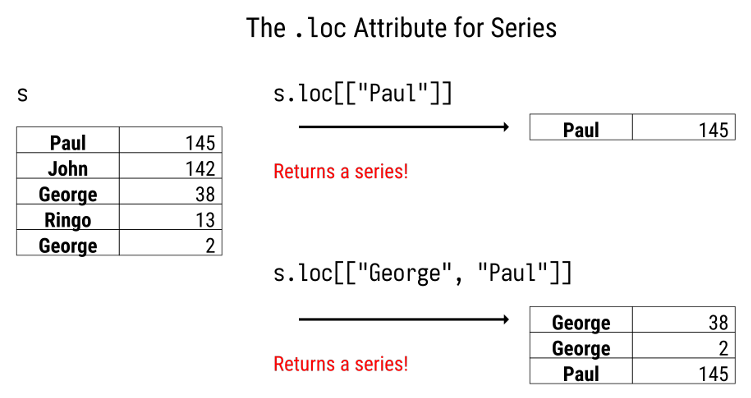

In [ ]:
city2.loc[['Fisker']]

Fisker    20
Name: city08, dtype: int64

In [ ]:
city2.loc[['Ferrari', 'Lamborghini']]

Ferrari         9
Ferrari        12
Ferrari        11
Ferrari        10
Ferrari        11
               ..
Lamborghini     6
Lamborghini     8
Lamborghini     8
Lamborghini     8
Lamborghini     8
Name: city08, Length: 357, dtype: int64

Para fazer o fatiamento (slicing) com indice labels do tipo string, é necessário fazer a ordenação para evitar ERROR.

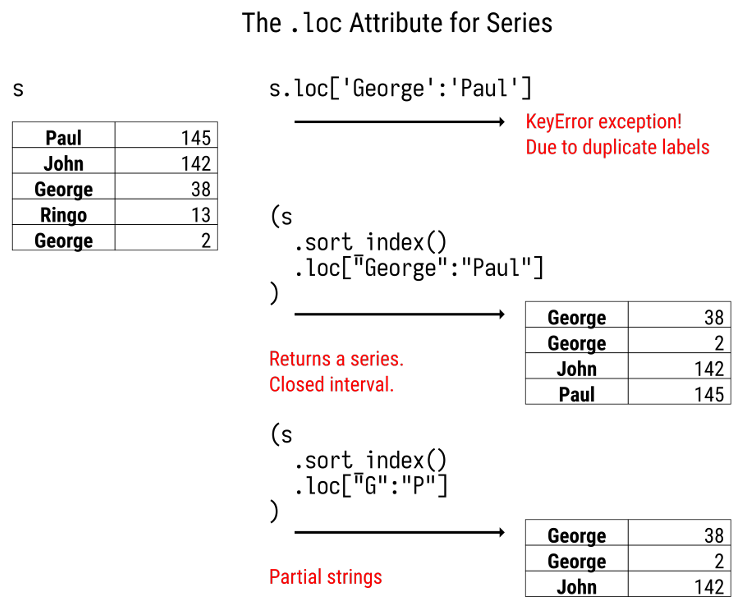

In [ ]:
city2.loc['Ferrari':'Lamborghini']

KeyError: ignored

In [ ]:
city2.sort_index().loc['Ferrari':'Lamborghini']

Ferrari        10
Ferrari        13
Ferrari        13
Ferrari         9
Ferrari        10
               ..
Lamborghini    12
Lamborghini     9
Lamborghini     8
Lamborghini    13
Lamborghini     8
Name: city08, Length: 11210, dtype: int64

Com o indice ordenado se pode fatiar com strings que não são exatamente indices

In [ ]:
city2.sort_index().loc['F':'J']

Federal Coach    15
Federal Coach    13
Federal Coach    13
Federal Coach    14
Federal Coach    13
                 ..
Isuzu            15
Isuzu            15
Isuzu            15
Isuzu            27
Isuzu            18
Name: city08, Length: 9040, dtype: int64

Uso de array booleano para definir um filtro com o uso de `.loc`.
Fabricante com "city mileage" superior a 50.

In [ ]:
mask = city2 > 50
mask

Alfa Romeo    False
Ferrari       False
Dodge         False
Dodge         False
Subaru        False
              ...  
Subaru        False
Subaru        False
Subaru        False
Subaru        False
Subaru        False
Name: city08, Length: 41144, dtype: bool

In [ ]:
city2.loc[mask]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64

O uso de funções habilita o acesso ao objeto intermediário.

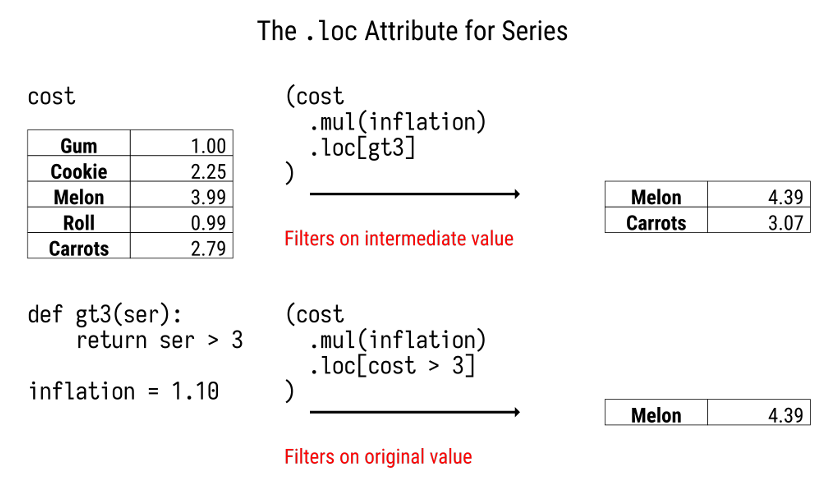

I have a series with old pricing information from last year. I know that there was a 10% increase in cost during that time. If I want to find all of the new prices that are above $3 after inflation, we can chain these operations together:

In [ ]:
cost = pd.Series([1.00, 2.25, 3.99, .99, 2.79],
                 index=['Gum', 'Cookie', 'Melon', 'Roll', 'Carrots' ])

inflation = 1.10
cost

Gum        1.00
Cookie     2.25
Melon      3.99
Roll       0.99
Carrots    2.79
dtype: float64

In [ ]:
(cost
  .mul(inflation)
  .loc[lambda s_ : s_ > 3]
)

Melon      4.389
Carrots    3.069
dtype: float64



---



In [ ]:
inflation = 1.10
mask = cost > 3

In [ ]:
(cost
  .mul(inflation)
  .loc[mask]
)

Melon    4.389
dtype: float64

## o atributo `.iloc`

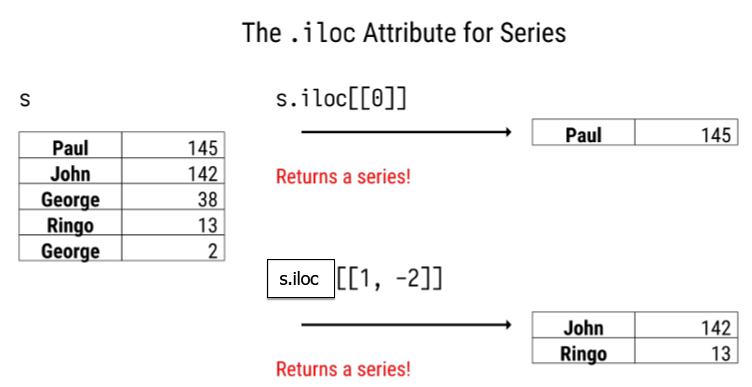

In [ ]:
s = pd.Series([145, 142, 38, 13, 2], 
                  index=["Paul", "John", "George", "Ringo", "George"])
s

Paul      145
John      142
George     38
Ringo      13
George      2
dtype: int64

In [ ]:
s.iloc[[0]]

Paul    145
dtype: int64

In [ ]:
s.loc[[0]]

KeyError: ignored

In [ ]:
s.iloc[[1, -2]]

John     142
Ringo     13
dtype: int64

In [ ]:
city2.iloc[-1]

16

In [ ]:
city3.iloc[[0,1,-1]]

0        19
1         9
41143    16
Name: citympg, dtype: int64

Slicing >> Half-open interval >> include first index but not the last

In [ ]:
city2.iloc[0:5]

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
Name: city08, dtype: int64

To return the last eight values

In [ ]:
city2.iloc[-8:]

Saturn    21
Saturn    24
Saturn    21
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, dtype: int64

In [ ]:
s.iloc[0:3]

Paul      145
John      142
George     38
dtype: int64

In [ ]:
s.iloc[-2:]

Ringo     13
George     2
dtype: int64

Uso Numpy array

In [ ]:
city2

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64

In [ ]:
mask = city2 > 50
mask

Alfa Romeo    False
Ferrari       False
Dodge         False
Dodge         False
Subaru        False
              ...  
Subaru        False
Subaru        False
Subaru        False
Subaru        False
Subaru        False
Name: city08, Length: 41144, dtype: bool

Suporta Numpy array de booleanos ou uma lista Python

In [ ]:
city2.iloc[mask]

ValueError: ignored

In [ ]:
mask.to_numpy()

array([False, False, False, ..., False, False, False])

In [ ]:
city2.iloc[mask.to_numpy()]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64

In [ ]:
city2.iloc[list(mask)]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64

## Heads and Tails

In [ ]:
city2.head(3)

Alfa Romeo    19
Ferrari        9
Dodge         23
Name: city08, dtype: int64

In [ ]:
city2.tail(3)

Subaru    18
Subaru    18
Subaru    16
Name: city08, dtype: int64

## Amostragem (Sampling)

In [ ]:
city2.sample(6, random_state=42)

Volvo         16
Mitsubishi    19
Buick         27
Jeep          15
Land Rover    13
Saab          17
Name: city08, dtype: int64

## Filtrando Valores de Indice (Filtering Index Values)

In [ ]:
city2.filter(items=['Ford', 'Subaru'])

ValueError: ignored

In [ ]:
city2.filter(like='rd')

Ford    18
Ford    16
Ford    17
Ford    17
Ford    15
        ..
Ford    26
Ford    19
Ford    21
Ford    18
Ford    19
Name: city08, Length: 3371, dtype: int64

In [ ]:
city2.filter(regex='(Ford)|(Subaru)')

Subaru    17
Subaru    21
Subaru    22
Ford      18
Ford      16
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 4256, dtype: int64

## Reindexação (Reindex)

In [ ]:
city2

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 41144, dtype: int64

In [ ]:
city2.reindex(['Missing', 'Ford'])

ValueError: ignored

In [ ]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [ ]:
city_mpg.reindex([0, 0, 10, 20, 2_000_000])

0          19.0
0          19.0
10         23.0
20         14.0
2000000     NaN
Name: city08, dtype: float64

Uso do reindex para series que possuem index labels idênticos

In [ ]:
s1 = pd.Series([10,20,30], index=['a', 'b', 'c'])
s2 = pd.Series([15,25,35], index=['b', 'c', 'd'])

In [ ]:
s2

b    15
c    25
d    35
dtype: int64

In [ ]:
s2.reindex(s1.index)

a     NaN
b    15.0
c    25.0
dtype: float64